**Exercise set 11**
==============


>In this exercise, we will process signals and you will learn how you
>can remove noise, obtain numerical derivatives of noisy signals, and
>correct near-infrared spectra by removing unwanted scattering effects.


**Exercise 11.1**

Savitzky&ndash;Golay filtering can be used to both smooth a signal and to obtain numerical
derivatives. We will here check that we indeed can obtain the numerical derivative
with a Savitzky&ndash;Golay filter. Note: A slightly more involved version of this
question can be found in the 2020 practice exam.

We consider a case where we set the window length to 3 and we have measured a signal, $y = f(x)$,
at uniformly spaced locations $x$. We set the spacing between points to be $h$. If we let
$x_0$ be the first point where we have measured the signal, then the locations of
the other points are given by $x_i = x_0 + i \times h$ for $i = 0, 1, 2, \ldots$.


**(a)**  Consider a specific window of length 3 where we have the set of points
$(x_0, f(x_0))$,
$(x_1, f(x_1))$, and,
$(x_2, f(x_2))$,
At a first step, we transform the original $x_i$ to scaled coordinates $z_i$
so that $z_0 = -1$, $z_1 = 0$, and $z_2 = 1$, 
This can be done
with the following transformation:

\begin{equation}
z_ i = \frac{x_i - \alpha}{\beta} .
\label{eq:transform}
\tag{1}\end{equation}

Verify that $\alpha = x_0 + h$ and $\beta = h$ gives the desired transformation.

**Your answer to question 11.1(a):**

The given transformation is,

\begin{equation}
 z_i = \frac{x_i - (x_0 + h)}{h} .
\end{equation}

We verify it by insering $x_0$, $x_1$, and $x_2$ while remembering that
$x_i = x_0 + i h$:

* $z_0 = (x_0 - x_0 - h)/h = -1$,
* $z_1 = (x_1 - x_0 - h)/h = (h-h)/h = 0$,
* $z_2 = (x_2 - x_0 - h)/h = (2h-h)/h = h/h = 1$.

**(b)**  In the window we are considering, we are going to fit a polynomial of order 2,
\begin{equation}
y = b_0 + b_1 z + b_2 z^2 .
\tag{2}\end{equation}

where we use $z$ as the variable. That is, we are now fitting to the set of points,
$(z_0, f(x_0))$,
$(z_1, f(x_1))$, and
$(z_2, f(x_2))$,
This fitting can be done with least squares and we can formulate the problem as,

\begin{equation}
\mathbf{y} = \mathbf{J} \mathbf{b},
\label{eq:ls}
\tag{3}
\end{equation}

where

\begin{equation}
\mathbf{y} = 
\begin{pmatrix}
f(x_0) \\
f(x_1) \\
f(x_2) \\
\end{pmatrix}
, \quad
\mathbf{b} = \begin{pmatrix}
b_0 \\
b_1 \\
b_2 \\
\end{pmatrix},
\tag{4}
\end{equation}

and $\mathbf{J}$ is a matrix created from $z_0$, $z_1$, and $z_2$.
What does the matrix $\mathbf{J}$ contain in this case and how would you construct it? Below
you can find a partially filled out $\mathbf{J}$ (one column is missing), can you
complete it by filling in the missing values?

\begin{equation}
\mathbf{J} =
\begin{pmatrix}
1 &  ? & 1 \\
1 &  ? & 0 \\
1 &  ? & 1 \\
\end{pmatrix}
\tag{5}\end{equation}

**Your answer to question 11.1(b):**

For the second order polynomial, $y = b_0 + b_1 z + b_2 z^2$, the $\mathbf{J}$ matrix
contains a column of 1 (for the $b_0$ coefficient), a column of $z$ (for the
$b_1$ coefficient) and a column of $z^2$ (for the $b_2$ coefficient. Written out, this is

\begin{equation}
\mathbf{J} =
\begin{pmatrix}
1 &  z_0 & z_0^2 \\
1 &  z_1 & z_1^2 \\
1 &  z_2 & z_2^2 \\
\end{pmatrix} =
\begin{pmatrix}
1 &  -1 & 1 \\
1 &  0 & 0 \\
1 &  1 & 1 \\
\end{pmatrix} .
\end{equation}

**(c)**  If you were to move the window and consider 3 new points,
say, $(x_{10}, f(x_{10}))$, $(x_{11}, f(x_{11}))$, and $(x_{12}, f(x_{12}))$,
would the
$\mathbf{J}$-matrix above change? Briefly justify your answer.



**Your answer to question 11.1(c):**

When we move the window, we do indeed get three new $x$-coordinates.
However, we transform these new coordinates so that they again correspond to
$z = \{-1, 0, 1\}$. This means that the $\mathbf{J}$ matrix will stay
the same. The practical implication of this is that the least squares
solution will have the same form. To be more specific, the least squares
solution to $\mathbf{y} = \mathbf{J} \mathbf{b}$ is

\begin{equation}
\mathbf{b} = \left(\mathbf{J}^\top \mathbf{J}\right)^{-1} \mathbf{J}^\top \mathbf{y}
\end{equation}

and $\left(\mathbf{J}^\top \mathbf{J}\right)^{-1} \mathbf{J}^\top$ will not change
when we move the window.

**(d)**  The least-squares solution to Eq. (3) can be written as,

\begin{equation}
  \mathbf{b} = 
\begin{pmatrix} 
b_0 \\
b_1 \\                 
b_2 \\
\end{pmatrix} = 
\begin{pmatrix}
0  &  1  &   0 \\
-1/2  &  0  & 1/2 \\
1/2  & -1  & 1/2 \\
\end{pmatrix}
\begin{pmatrix} 
f(x_0) \\ 
f(x_1) \\   
f(x_2) 
\end{pmatrix}.
\tag{6}
\end{equation}

Explain how you can use this equation to obtain the first derivative
at the central location where $z=0$.

**Your answer to question 11.1(d):**

The polynomial we have fitted is on the form $y = b_0 + b_1 z + b_2 z^2$.
The derivative evaluated at $z=0$ is:

\begin{equation}
\frac{\text{d} y}{\text{d} z} \Big\vert_{z=0} = (b_1 + 2 b_2 z)\vert_{z=0} = b_1.
\end{equation}

This means that the estimate of the derivative is given by the coefficient $b_1$.
A complicating factor is that this derivative is with respect to $z$ and not $x$. To
turn this into a derivative with respect to $x$, we can use the chain rule:

\begin{equation}
\frac{\text{d} y}{\text{d} x} = \frac{\text{d} y}{\text{d} z} \frac{\text{d} z}{\text{d} x},
\end{equation}

where $\frac{\text{d} z}{\text{d} x} = \frac{1}{h}$ from the equation defining the transformation
between $x$ and $z$. So in summary, the derivative of our original signal in this particular
window will be given by $b_1 / h$.

**(e)**  An alternative numerical expression for the derivative at the central
point is the central-difference expression:

\begin{equation}
f^\prime (x) = \frac{f(x + h) - f(x - h)}{2 h}.
\tag{7}\end{equation}

Show that this expression is the same as you can obtain from the Savitzky&ndash;Golay coefficients.
Three hints:

*  Consider the expression for the derivative using the Savitzky&ndash;Golay coefficients at
   the central location $x_1$ ($z_1 = 0$).

*  Use that $x_i = x_0 + i\times h$, i.e. $x_0 = x_1 - h$ and $x_2 = x_1 + h$.

*  Use the chain rule for the polynomial,
   $\frac{\text{d} y}{\text{d} x} = \frac{\text{d} y}{\text{d} z} 
   \frac{\text{d} z}{\text{d} x}$, and show that $\frac{\text{d} z}{\text{d} x} = \frac{1}{h}$ using
   Eq. (1).

**Your answer to question 11.1(e):**

We found in the previous question that the derivative is given
by $b_1 / h$. Let us insert the value of $b_1$ here.
From the least squares solution, we see that,

\begin{equation}
b_1 = (-1/2) f(x_0) + (1/2) f(x_2) = \frac{f(x_2) - f(x_0)}{2} .
\end{equation}

This means that the derivative is,

\begin{equation}
\frac{\text{d} y}{\text{d} x} = \frac{b_1}{h} = \frac{f(x_2) - f(x_0)}{2h} .
\end{equation}

Next, we use that $x_i = x_0 + ih$ so that we can write $x_2 = x_1 + h$ and $x_0 = x_1 -h$:

\begin{equation}
\frac{\text{d} y}{\text{d} x} = \frac{f(x_1 + h) - f(x_1 - h)}{2h} .
\end{equation}

We see that this is identical to the central-difference expression if we
rename our central point $x_1$ to $x$.

**Exercise 11.2**

In this exercise, we will test out the Savitzky&ndash;Golay filter for smoothing
and numerical differentiation. We will use a test signal which has been generated
from the following analytical function,

\begin{equation}
y(t) = \sin 8t - 1.8t^2 + 0.5t^3.
\label{eq:signal}
\tag{8}\end{equation}

The signal is available in the file [`Data/signal.txt`](Data/signal.txt).
In addition, we will investigate a test signal which is generated from the same
analytical function, but with noise added. This signal is available in the file
[`Data/signal_noise.txt`](Data/signal_noise.txt).

In `scipy`, a Savitzky&ndash;Golay filter can be created by using
the method `savgol_filter` from [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html).

**(a)**  Consider first the signal without the noise and apply a
Savitzky&ndash;Golay smoothing filter to it. Here you can experiment
with the window size and polynomial order, for instance, a window size of $5$
or $7$ and a polynomial order of $3$ or $5$.
Does the filter you are considering change the original signal?

<IPython.core.display.Javascript object>


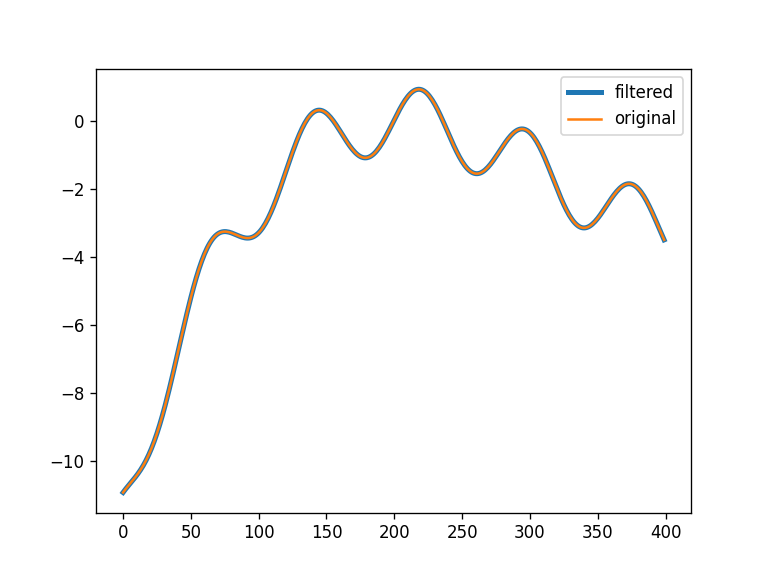

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

signal = np.loadtxt("Data/signal.txt", )
signal_noise = np.loadtxt("Data/signal_noise.txt")

filtered = savgol_filter(signal[:,1], window_length=5, polyorder=3)

plt.plot(filtered, label="filtered", lw=3) # Bigger line_width to show overlap
plt.plot(signal[:,1], label="original")
plt.legend();

<IPython.core.display.Javascript object>


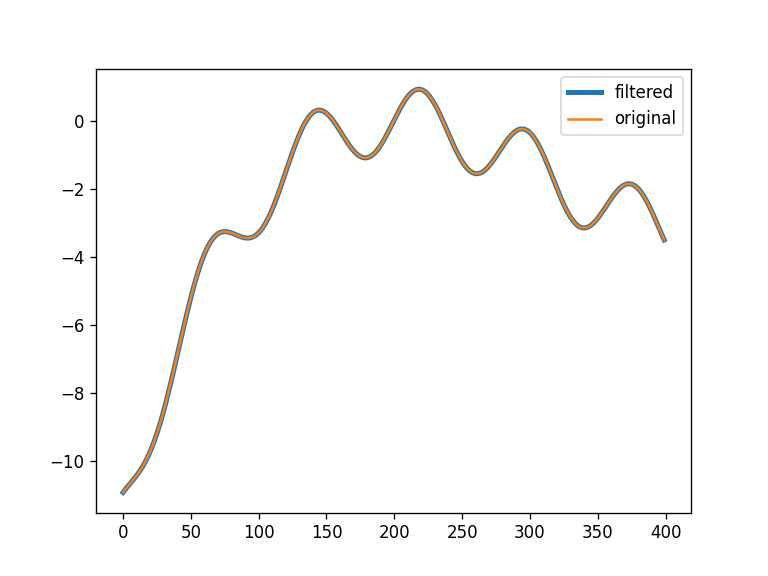

In [2]:
filtered = savgol_filter(signal[:,1], window_length=7, polyorder=3)

fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure

ax.plot(filtered, label="filtered", lw=3)
ax.plot(signal[:,1], label="original")
ax.legend();

**Your answer to question 11.2(a):** They overlap completely.

**(b)**  Create a Savitzky&ndash;Golay filter for first-order differentiation with a
window size of $7$ and polynomial order of $3$. Apply this to the signal
without noise and compare the differentiated signal with the analytical
derivative of Eq. (8). 

Note: In order to obtain the derivative,
you will have to supply the spacing between your points using the
`delta` parameter of the `savgol_filter` method.
Further, you will have to tell the method to compute the derivative by
setting the parameter `deriv`  to the order of the derivative
you want. An example of this can be found below:

<IPython.core.display.Javascript object>


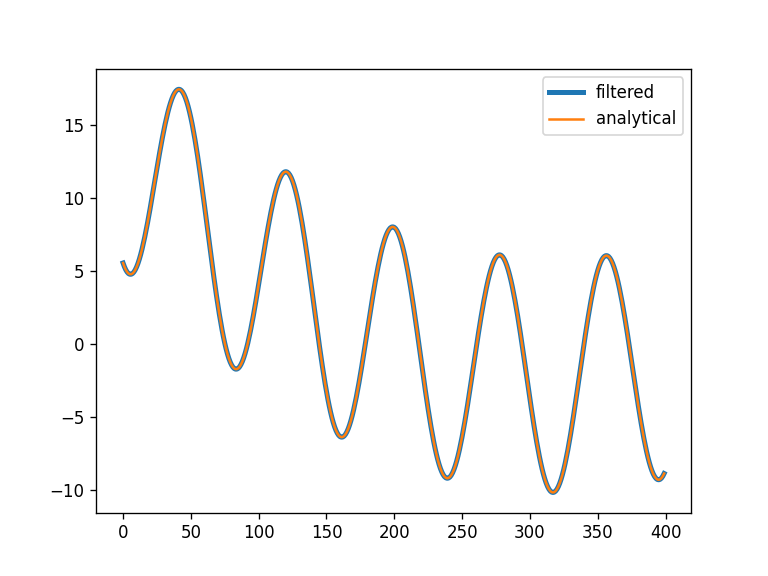

In [3]:
delta = signal[1,0]-signal[0,0] # Get the t spacing of the signal
filtered = savgol_filter(signal[:,1], window_length=5, polyorder=3, deriv=1, delta=delta)

t = signal[:,0]
analytical = 8*np.cos(8*t)-1.8*2*t+0.5*3*t**2

fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure
ax.plot(filtered, label="filtered", lw=3)
ax.plot(analytical, label="analytical")
ax.legend();

**Your answer to question 11.2(b):** After making sure we give it the spacing between different signals with `delta` the filtered derivative is equal to the analyitical one.

**(c)**  Create a Savitzky&ndash;Golay filter for smoothing of the signal *with* noise.
Here, you have to experiment with the window size to use. Use a polynomial
order of $3$, and compare your smoothed signal with the original signal, and
the signal without noise.



<IPython.core.display.Javascript object>


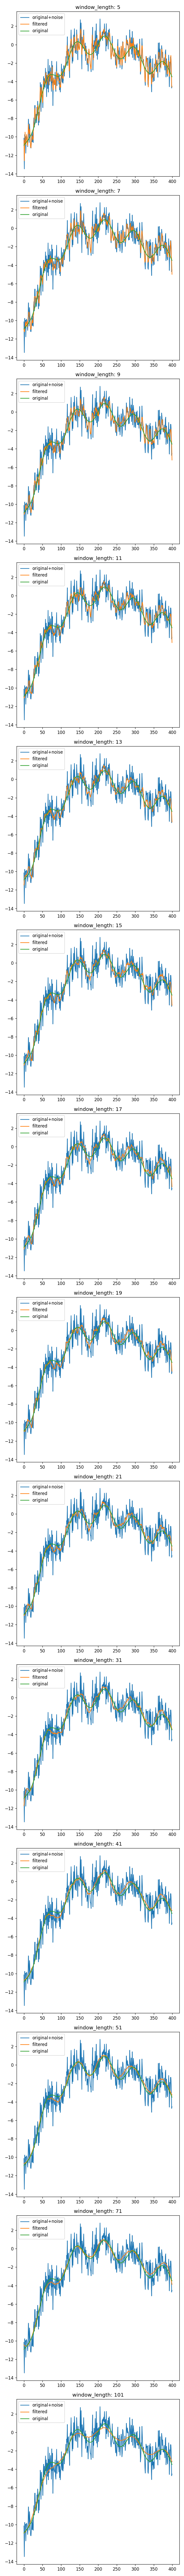

In [4]:
windows = list(range(5,22,2))
windows += [31,41,51,71, 101]
fig, axs = plt.subplots(len(windows), 1, figsize=(6, 6*len(windows)))
axs = axs.flatten()
for window, ax in zip(windows, axs):
    filtered = savgol_filter(signal_noise[:,1], window_length=window, polyorder=3)
    ax.plot(signal_noise[:, 1], label="original+noise")
    ax.plot(filtered, label="filtered")
    ax.plot(signal[:, 1], label="original")
    ax.set_title(f"window_length: {window}")
    ax.legend()
fig.tight_layout()

**Your answer to question 11.2(c):** A bigger window gives smoother signal after filtering, which becomes closer and closer to the original signal. Untill you pass the "period" of your signal, where it smoothes out to much.

**(d)**  Create a Savitzky&ndash;Golay filter for first-order differentiation of the signal
*with* noise. Here, you have to experiment with the window size to use.
Use a polynomial order of $3$ and compare your differentiated signal
with the analytical derivative of Eq. (8).

<IPython.core.display.Javascript object>


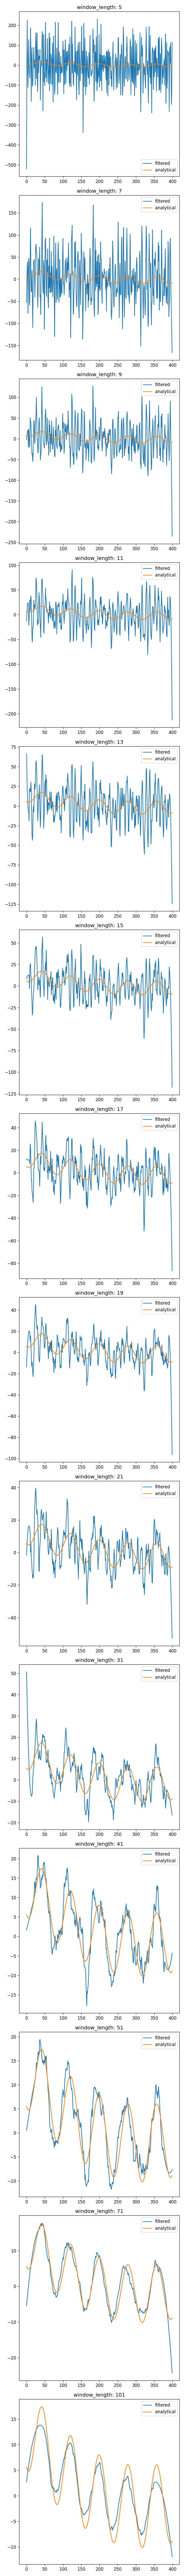

In [5]:
fig, axs = plt.subplots(len(windows), 1, figsize=(6, 6*len(windows)))
axs = axs.flatten()
for window, ax in zip(windows, axs):
    filtered = savgol_filter(signal_noise[:,1], window_length=window, polyorder=3, deriv=1, delta=delta)
    ax.plot(filtered, label="filtered")
    ax.plot(analytical, label="analytical")
    ax.set_title(f"window_length: {window}")
    ax.legend()
fig.tight_layout()

**Your answer to question 11.2(d):** *Double click here*

**Exercise 11.3**

In this exercise, we will try to smooth a signal by performing convolution.
We will attempt to smooth the signal given in Eq. (8)
with added noise (data file: [`Data/signal_noise.txt`](Data/signal_noise.txt)). A short example
of performing convolution with `scipy/numpy` can be found below:

<IPython.core.display.Javascript object>


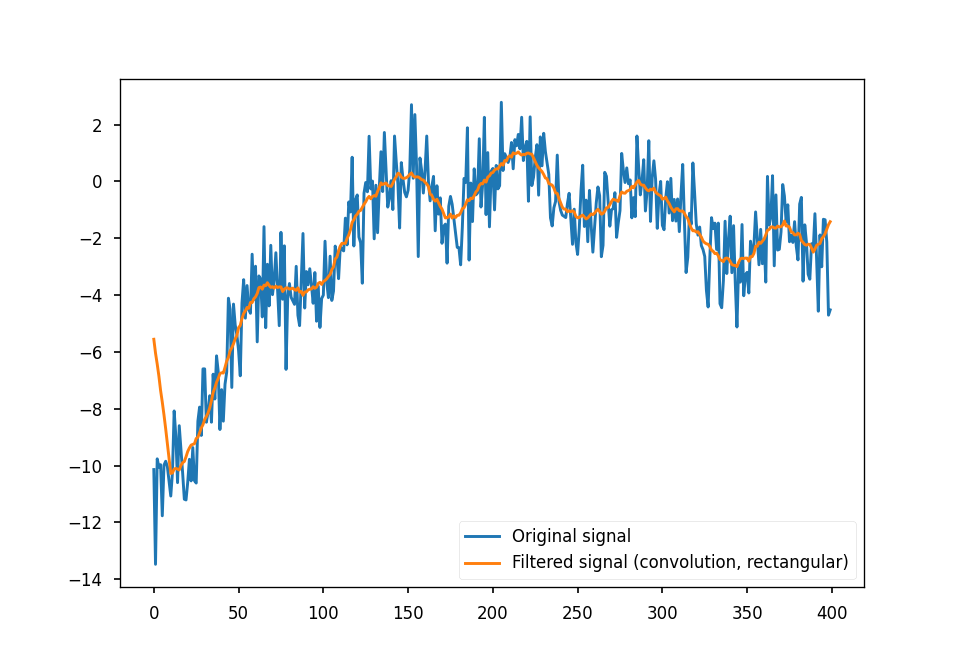

In [6]:
import numpy as np
from scipy.signal import windows
from matplotlib import pyplot as plt
plt.style.use('seaborn-notebook')

signal = np.loadtxt('Data/signal_noise.txt')[:, 1]  # Load signal.
window = windows.boxcar(21)  # Create a rectangular window of 21 points
window /= window.sum()  # Normalize the window.
conv = np.convolve(signal, window, mode='same')  # Calculate convolution.
# Plot the original signal and the filtered one.
fig, ax = plt.subplots(1,1) # Needed to not replot in the previous figure
ax.plot(signal, label='Original signal')
ax.plot(conv, label='Filtered signal (convolution, rectangular)')
ax.legend()

**(a)**  For smoothing the signal, we will use a windowing function for the convolution.
In the code above we use a simple rectangular window for the smoothing,
but in `scipy`, there are several windowing functions
available. A list of the available windowing
functions can be found [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) and
they behave differently. Here,
you can experiment with different windowing functions and/or different
windowing lengths. Are you able to remove most of the noise from
the given signal?

<IPython.core.display.Javascript object>


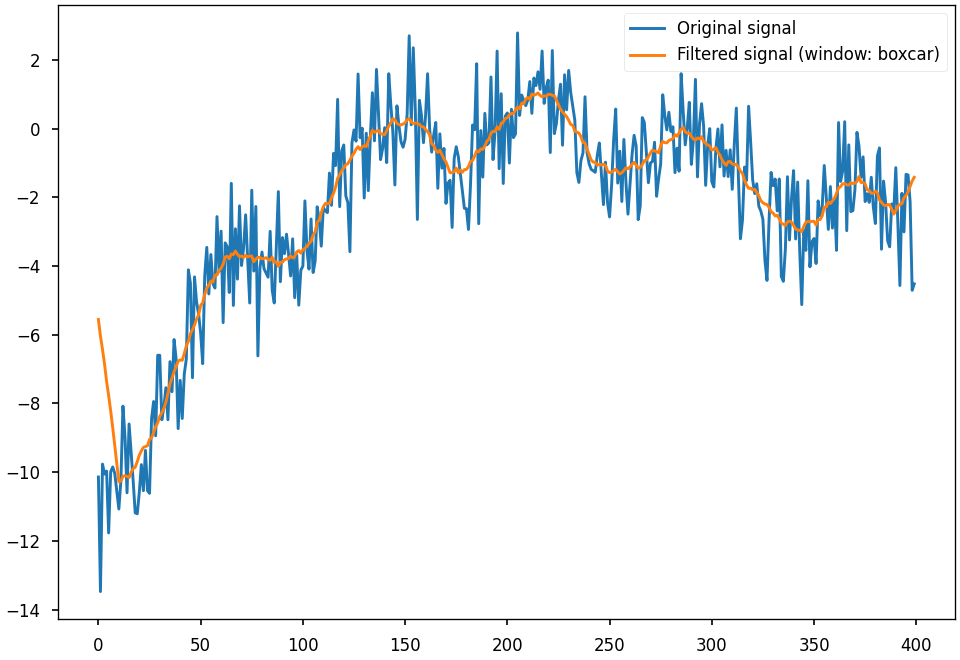

<IPython.core.display.Javascript object>


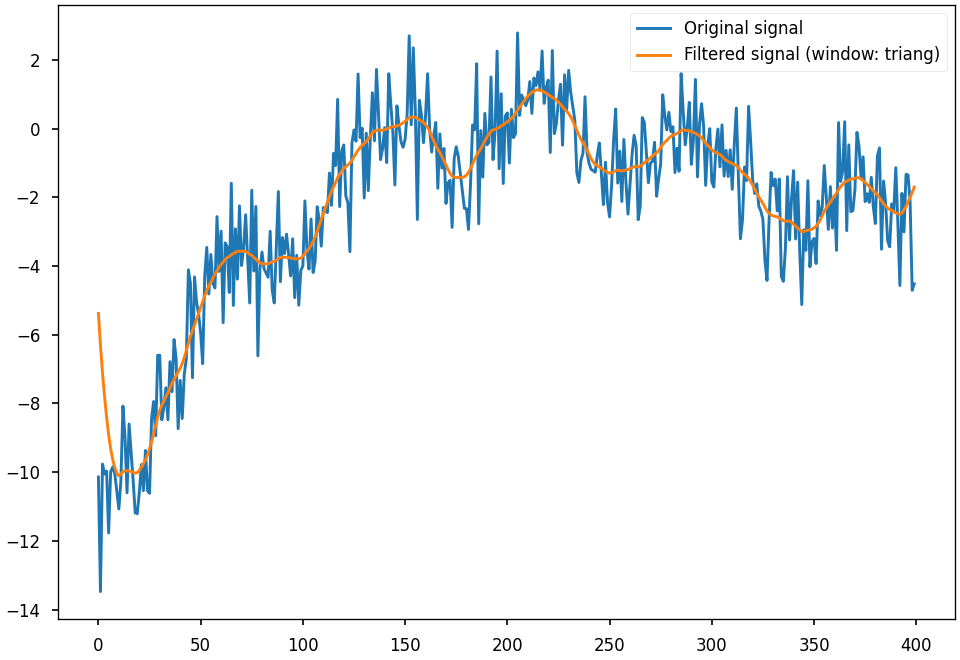

<IPython.core.display.Javascript object>


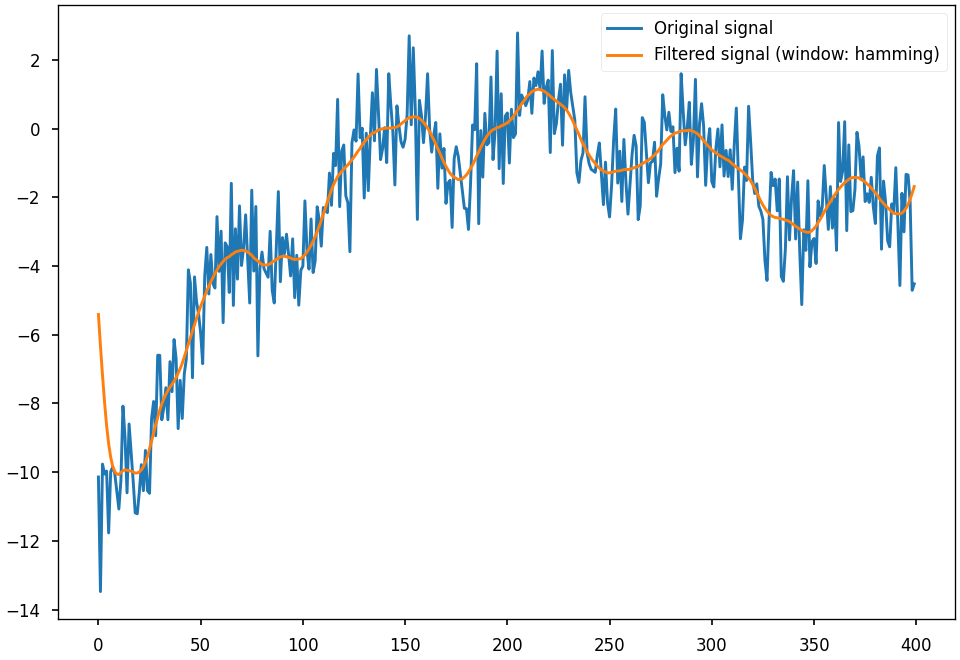

<IPython.core.display.Javascript object>


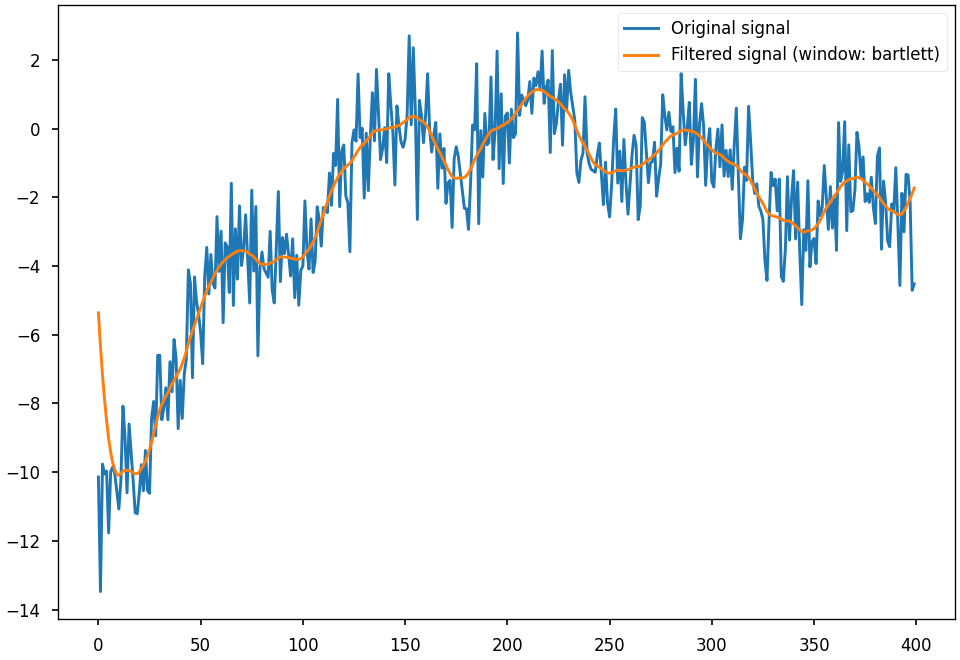

In [7]:
from scipy.signal import get_window
names = ['boxcar', 'triang', 'hamming', 'bartlett']
for name in names:
    window = get_window(name, 21)
    window /= window.sum()
    conv = np.convolve(signal, window, mode='same')
    figi, axi = plt.subplots(constrained_layout=True)
    axi.plot(signal, label='Original signal')
    axi.plot(conv, label=f'Filtered signal (window: {name})')
    axi.legend()

**Your answer to question 11.3(a):** Yes, by performing the convolution we can remove most of the noise from the given signal.

**Exercise 11.4**

You have measured the signal given in the file [`Data/spike.txt`](Data/spike.txt). Unfortunately, 
the signal contains a prominent spike that you would like to remove. In the code below,
we attempt to remove the spike by doing a convolution with
a rectangular window. Run this code and observe the results.

<IPython.core.display.Javascript object>


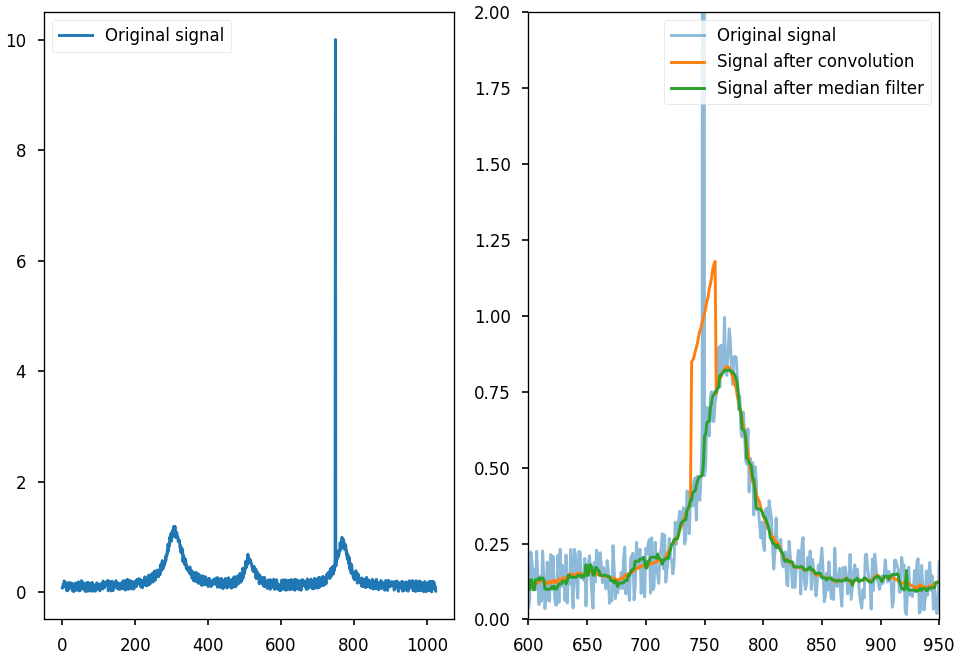

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import windows
plt.style.use('seaborn-notebook')


def median_filter(yvalues, width=11):
    """Apply a median filter to the given y-values."""
    medians = []
    half = width // 2
    length = len(yvalues) - 1
    for i, _ in enumerate(yvalues):
        left = max(0, i - half)
        right = min(length, i + half)
        med = np.median(yvalues[left:right + 1])
        medians.append(med)
    return np.array(medians)

signal = np.loadtxt('Data/spike.txt')
window = window = windows.boxcar(21)
window /= window.sum()
conv = np.convolve(signal, window, mode='same')  # Do convolution
filter_median = median_filter(signal, width=21)  # Apply median filter
# Plot the results:
fig, axes = plt.subplots(constrained_layout=True, ncols=2)
axes[0].plot(signal, label='Original signal')
axes[0].legend()
axes[1].plot(signal, alpha=0.5, label='Original signal')
axes[1].plot(conv, label='Signal after convolution')
axes[1].plot(filter_median, label='Signal after median filter')
# Zoom in around the spike:
axes[1].set_xlim(600, 950)  
axes[1].set_ylim(0, 2)
axes[1].legend()
plt.show()

**(a)**  As you can see from the results of applying the convolution, 
the spike has not been completely removed, rather,
it has been made broader. Can you explain what seems to be
happening around the spike when you apply the convolution?

**Your answer to question 11.4(a):** The convolution is averaging the signal in the given window. Here, the spike will give a large contribution to the average, meaning that it will spread out over windows close to the spike.

**(b)**  The code given above also includes a so-called *median* filter.
The median filter
returns the median value of the signal in a given window. Applying
this filter seems to do a better job of removing the spike. Can you explain
why this is the case?

**Your answer to question 11.4(b):** The median filter will pick out the median value in each window. The median is less influenced by extreme values (such as the spike) meaning that the median filter can remove the spike.

**Exercise 11.5**

Multiple Scatter Correction (MSC) is one approach to remove non-linear
effects in near-infrared (NIR) spectra. Such effects may arise as a result
of scattering effects in a sample.
This will generate additional variance which is not related to the
chemical interesting information contained in the spectrum, and we would,
therefore, like to remove it.

The file [`Data/nir_msc.txt`](Data/nir_msc.txt) contains $222$ spectra that have been
sampled at $121$ wavelengths. Each row contains a spectrum, and each
column represents a single wavelength. You will now apply MSC to
correct these spectra.


**(a)**  Find a representative spectrum by taking the mean of the $222$ spectra.
We will refer to this representative spectrum as $f(x)$ in the following.

<IPython.core.display.Javascript object>


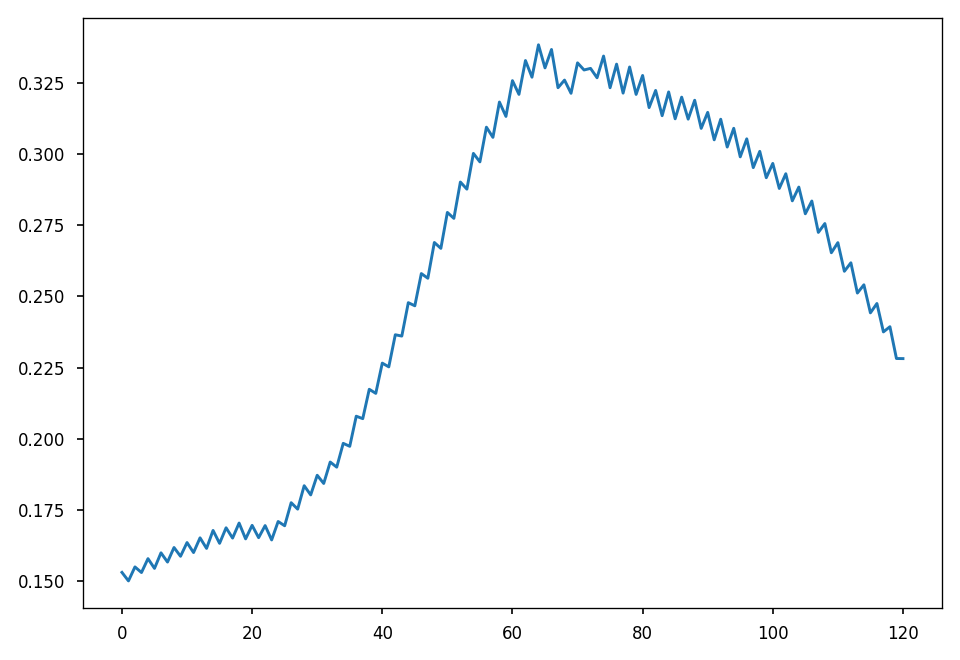

In [9]:
data = np.loadtxt("Data/nir_msc.txt")

mean = np.mean(data, axis=0)

fig, ax = plt.subplots(1,1)
ax.plot(mean, label="mean")
fig.tight_layout()

**Your answer to question 11.5(a):** *Double click here*

**(b)**  Correct each spectrum, $h_i(x)$, by first fitting it to a linear
equation,

\begin{equation}
h_i(x) = a_i f(x) + b_i ,
\end{equation}

and then remove the scattering effects by taking,

\begin{equation}
h_{i, \text{corrected}}(x) = \frac{h_i(x) -b_i}{a_i} .
\end{equation}

In [10]:
corrected = data.copy()
for i, row in enumerate(corrected):
    fit = np.polyfit(mean, row, deg=1)
    row -= fit[1]
    row /= fit[0]

**Your answer to question 11.5(b):** *Double click here*

**(c)**  Plot the corrected and uncorrected spectra.
Does this look like what you would expect?



<IPython.core.display.Javascript object>


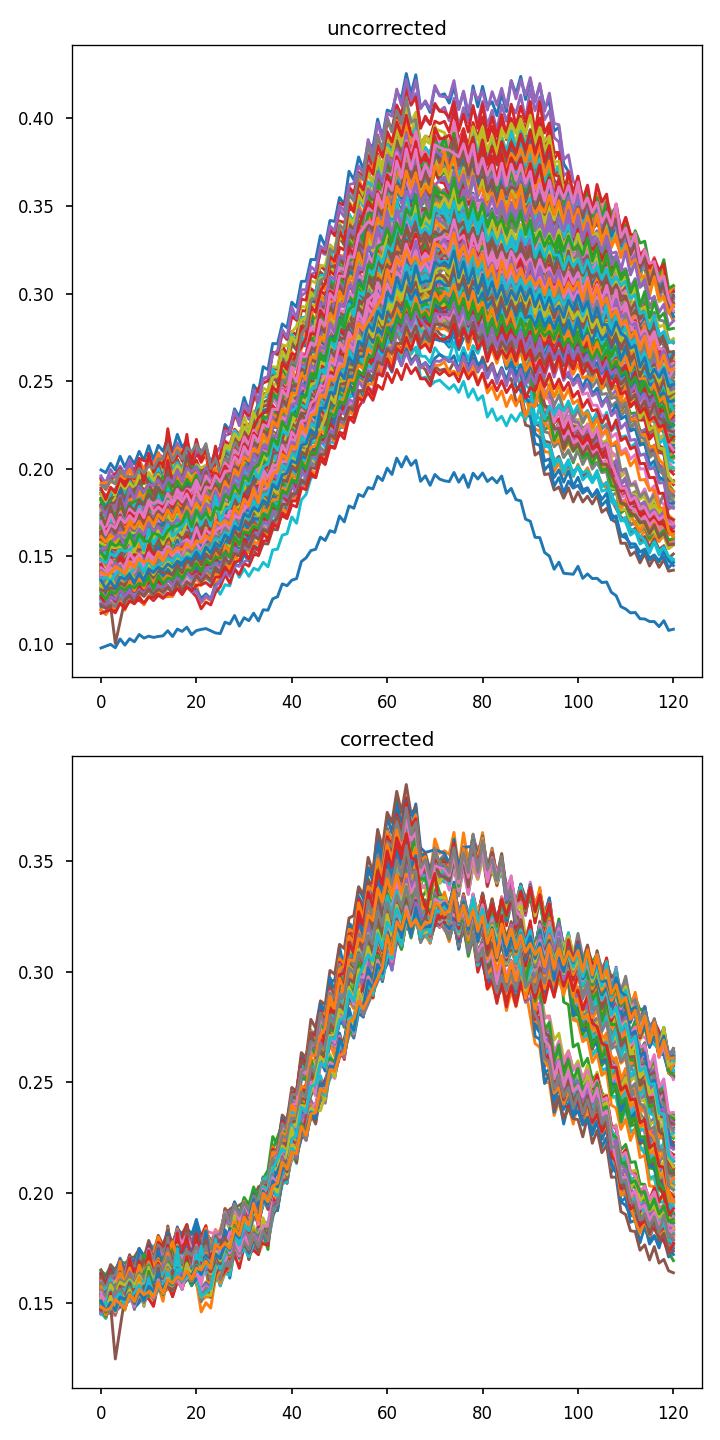

In [11]:
fig, axs = plt.subplots(2,1, figsize=(6,12))
axs  = axs.flatten()

axs[0].plot(data.T)
axs[0].set_title("uncorrected")

axs[1].plot(corrected.T)
axs[1].set_title("corrected")

fig.tight_layout()

**Your answer to question 11.5(c):**  It does look like expected, as you can see the measured fluctuations in the range 30-60 completely disappear, which indicates some scattering happens in that range

**(d)**  As stated above MSC will remove some of the (presumably) uninteresting
variance. We can quantify this by calculating the sum of squares, $SS_0$,

\begin{equation}
SS_0 = \sum_i \sum_j (x_{ij} - \overline{x}_j)^2,
\end{equation}

where $x_{ij}$ is the absorbance for spectrum $i$ at wavelength $j$, and
$\overline{x}_j$ is the mean of all spectra for wavelength $j$.
Calculate $SS_0$ for both the corrected and uncorrected spectra.
Does MSC reduce $SS_0$ as we expect?

In [12]:
SS0_raw = ((data-mean)**2).sum()
SS0_corrected = ((corrected-corrected.mean(axis=0))**2).sum()
print("SS0 raw: {}".format(SS0_raw))
print("SS0 corrected: {}".format(SS0_corrected))

SS0 raw: 30.652283772034313
SS0 corrected: 6.540032788542828


**Your answer to question 11.5(d):** This is what you would expect, as the correction reduces variance coming from scattering effects. 